In [3]:
import pandas as pd 
import Apriori
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']

In [6]:
dataSet = Apriori.loadDataSet()

In [7]:
dataSet

[['a', 'c', 'e'],
 ['b', 'd'],
 ['b', 'c'],
 ['a', 'b', 'c', 'd'],
 ['a', 'b'],
 ['b', 'c'],
 ['a', 'b'],
 ['a', 'b', 'c', 'e'],
 ['a', 'b', 'c'],
 ['a', 'c', 'e']]

In [11]:
L,supportData = Apriori.apriori(dataSet,minSupport=0.3)

In [12]:
rule = Apriori.gen_rule(L,supportData,minConf=0.5)

frozenset({'e'}) --> frozenset({'c'}) 支持度 0.3 置信度： 1.0 lift值为： 1.428571
frozenset({'e'}) --> frozenset({'a'}) 支持度 0.3 置信度： 1.0 lift值为： 1.428571
frozenset({'a'}) --> frozenset({'c'}) 支持度 0.5 置信度： 0.714286 lift值为： 1.020408
frozenset({'c'}) --> frozenset({'a'}) 支持度 0.5 置信度： 0.714286 lift值为： 1.020408
frozenset({'e'}) --> frozenset({'a', 'c'}) 支持度 0.3 置信度： 1.0 lift值为： 2.0
frozenset({'a', 'e'}) --> frozenset({'c'}) 支持度 0.3 置信度： 1.0 lift值为： 1.428571
frozenset({'e', 'c'}) --> frozenset({'a'}) 支持度 0.3 置信度： 1.0 lift值为： 1.428571
frozenset({'a', 'c'}) --> frozenset({'e'}) 支持度 0.3 置信度： 0.6 lift值为： 2.0


In [13]:
dataSet

[['a', 'c', 'e'],
 ['b', 'd'],
 ['b', 'c'],
 ['a', 'b', 'c', 'd'],
 ['a', 'b'],
 ['b', 'c'],
 ['a', 'b'],
 ['a', 'b', 'c', 'e'],
 ['a', 'b', 'c'],
 ['a', 'c', 'e']]

In [16]:
df = pd.read_csv('pandas_data/Aprior/GoodsOrder.csv',encoding='gbk')

In [21]:
len(df.drop_duplicates('id'))

9835

In [23]:
top = df['Goods'].value_counts()#统计次数

In [35]:
index = top.head(10).index
labels = top.head(10).values

<BarContainer object of 10 artists>

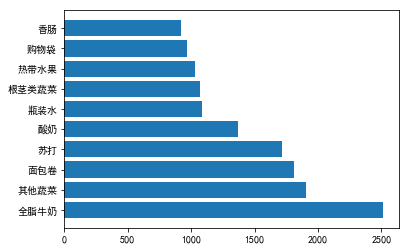

In [36]:
plt.barh(index,labels)

In [4]:
df = pd.read_csv('pandas_data/AprioriRuler/Data_Basket.csv')

In [5]:
df.head()

,Card num.,Amount,Payment,Gender,Tenant,Income,Age,Fruits & vegetables,Meat,Milk products,Canned vegetables,Canned meat,Frozen goods,Beer,Wine,Soda drinks,Fish,Textile
0,39808,427.12,Cheque,M,Yes,270000,46,No,Yes,Yes,No,No,No,No,No,No,No,Yes
1,67362,253.56,Cash,F,Yes,300000,28,No,Yes,No,No,No,No,No,No,No,No,Yes
2,10872,206.17,Cash,M,Yes,132000,36,No,No,No,Yes,No,Yes,Yes,No,No,Yes,No
3,26748,236.88,Card,F,Yes,122000,26,No,No,Yes,No,No,No,No,Yes,No,No,No
4,91609,188.13,Card,M,No,110000,24,No,No,No,No,No,No,No,No,No,No,No


In [10]:
df = df.iloc[:,7:]

In [11]:
df.head()

,Fruits & vegetables,Meat,Milk products,Canned vegetables,Canned meat,Frozen goods,Beer,Wine,Soda drinks,Fish,Textile
0,No,Yes,Yes,No,No,No,No,No,No,No,Yes
1,No,Yes,No,No,No,No,No,No,No,No,Yes
2,No,No,No,Yes,No,Yes,Yes,No,No,Yes,No
3,No,No,Yes,No,No,No,No,Yes,No,No,No
4,No,No,No,No,No,No,No,No,No,No,No


In [60]:
shop = {x:y for y,x in zip(df.columns,range(len(df.columns)))}

In [70]:
shop_list = []
for i in df.iterrows():
    s_list2 = []
    for j,k in zip(i[1],range(11)):
        if j=='Yes':
            s_list2.append(shop[k])
            shop_list.append(s_list2)


In [91]:
temp = []
for i in shop_list:
    if i not in temp:
        temp.append(i)
    

NameError: name 'df' is not defined

In [93]:
L,supportData = Apriori.apriori(temp,minSupport=0.1)


In [94]:
rule = Apriori.gen_rule(L,supportData,minConf=0.5)

frozenset({'Fruits & vegetables'}) --> frozenset({'Fish'}) 支持度 0.208108 置信度： 0.516779 lift值为： 1.327834
frozenset({'Fish'}) --> frozenset({'Fruits & vegetables'}) 支持度 0.208108 置信度： 0.534722 lift值为： 1.327834
frozenset({'Frozen goods'}) --> frozenset({'Canned vegetables'}) 支持度 0.202703 置信度： 0.513699 lift值为： 1.250451
frozenset({'Frozen goods'}) --> frozenset({'Beer'}) 支持度 0.2 置信度： 0.506849 lift值为： 1.389143
frozenset({'Beer'}) --> frozenset({'Frozen goods'}) 支持度 0.2 置信度： 0.548148 lift值为： 1.389143
frozenset({'Beer'}) --> frozenset({'Canned vegetables'}) 支持度 0.2 置信度： 0.548148 lift值为： 1.334308
frozenset({'Frozen goods', 'Beer'}) --> frozenset({'Canned vegetables'}) 支持度 0.151351 置信度： 0.756757 lift值为： 1.842105
frozenset({'Frozen goods', 'Canned vegetables'}) --> frozenset({'Beer'}) 支持度 0.151351 置信度： 0.746667 lift值为： 2.04642
frozenset({'Beer', 'Canned vegetables'}) --> frozenset({'Frozen goods'}) 支持度 0.151351 置信度： 0.756757 lift值为： 1.917808
